In [1]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots
import pandas as pd
import xarray as xr

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist
settings_path = 'settings/tropics_20d.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st = storm_tracker.StormTracker(gr, overwrite = False) #overwrite = True is super long
# jd = joint_distrib.JointDistribution(gr, st)

Data loaded from /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/grid_attributes.pkl instead of computing
Loading storms...
loading storms from netcdf
Time elapsed for loading storms: 0.57 seconds


In [4]:
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = False)
# jd_mm = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_Prec", var_id_2 = "max_Prec", nd=5, overwrite = True)

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.94 seconds


In [5]:
## land and ocean mask 
lm = gr.get_landmask()
land = lm.Landmask == 1
ocean = lm.Landmask == 0

## Check new regions (of Y and on map)

In [6]:
# %matplotlib inline
# convective_mask = xr.where(jd.prec.Treshold_cond_alpha_50_Prec > 2, True, False).values
# jd =joint_distrib.JointDistribution(gr, st, var_id_1 = "Sigma_cond_alpha_50_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = convective_mask)

# fig, axs = plt.subplots(1, 3, figsize=(3.7*4.8, 4.85))


# jd.plot_data(jd.bincount, scale = 'log', label = "bincount", cmap=plt.cm.magma_r , fig = fig, ax = axs[0])
# jd.plot(mask = False, branch=False, fig = fig, ax = axs[1])
# jd.plot(mask = True, branch = False, fig = fig, ax = axs[2])
# plt.tight_layout()

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.92 seconds


/home/mcarenso/code/tempest/tempest/joint_distrib.py:458: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/home/mcarenso/code/tempest/tempest/joint_distrib.py:458: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


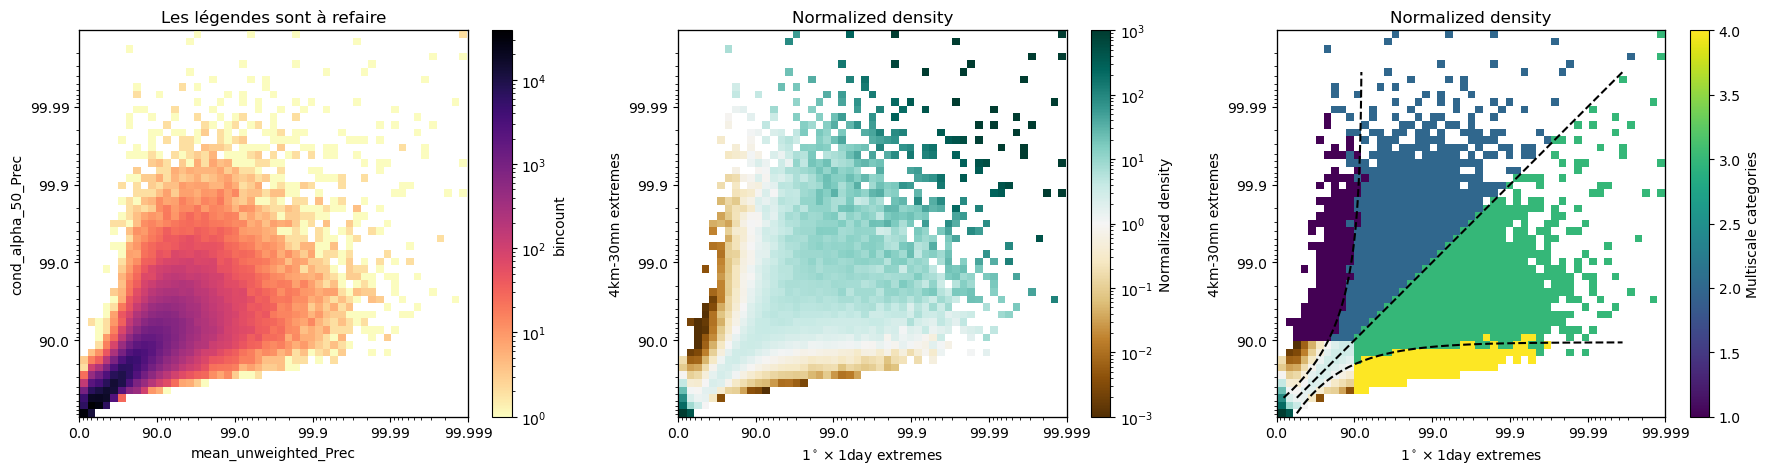

In [7]:
%matplotlib inline
jd =joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = False)

fig, axs = plt.subplots(1, 3, figsize=(3.75*4.8, 4.85))

jd.plot_data(jd.bincount, scale = 'log', label = "bincount", cmap=plt.cm.magma_r , fig = fig, ax = axs[0])
axs[0].set_title("Les légendes sont à refaire")
jd.plot(mask = False, branch=False, fig = fig, ax = axs[1])
jd.plot(mask = True, branch = True, fig = fig, ax = axs[2])
plt.tight_layout()

In [8]:
jd.prec.mean_unweighted_Prec
jd.dist1.percentiles

array([0.00000000e+00, 3.63422688e-03, 8.60098037e-03, 1.40383269e-02,
       2.29035722e-02, 3.77806469e-02, 6.14448695e-02, 9.63025351e-02,
       1.41322364e-01, 1.95900486e-01, 2.56387100e-01, 3.21573376e-01,
       3.91613447e-01, 4.60813382e-01, 5.34102531e-01, 6.09288690e-01,
       6.86138553e-01, 7.63745282e-01, 8.45676595e-01, 9.29287547e-01,
       1.01608960e+00, 1.10083213e+00, 1.19121043e+00, 1.29056282e+00,
       1.37592087e+00, 1.47610622e+00, 1.57418747e+00, 1.68516110e+00,
       1.79193670e+00, 1.92479972e+00, 2.04326982e+00, 2.19487995e+00,
       2.32487876e+00, 2.50380019e+00, 2.68407088e+00, 2.86129953e+00,
       3.05544221e+00, 3.20576077e+00, 3.47460742e+00, 3.76751631e+00,
       4.05011444e+00, 4.26663153e+00, 4.63988289e+00, 4.93972356e+00,
       5.37950535e+00, 5.73345085e+00, 6.01539490e+00, 6.47183759e+00,
       7.41370781e+00, 7.51096031e+00, 7.75147961e+00])

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.90 seconds
Convective only
figure size = 15 3.25


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mostly convective
figure size = 15 3.25


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mostly mesoscale
figure size = 15 3.25


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mesoscale only
figure size = 15 3.25


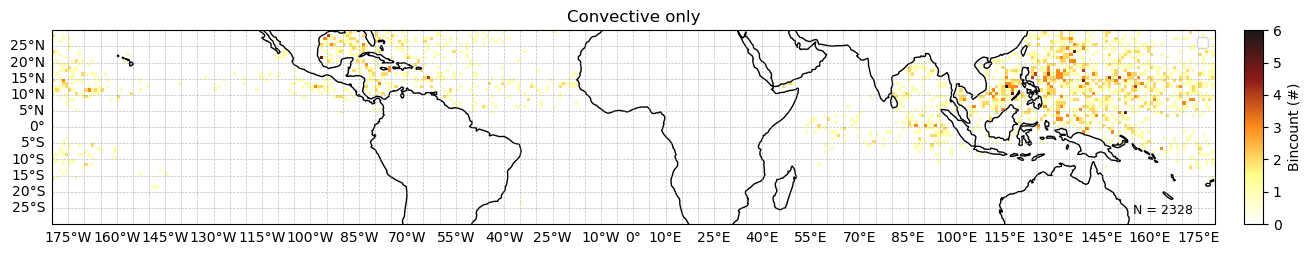

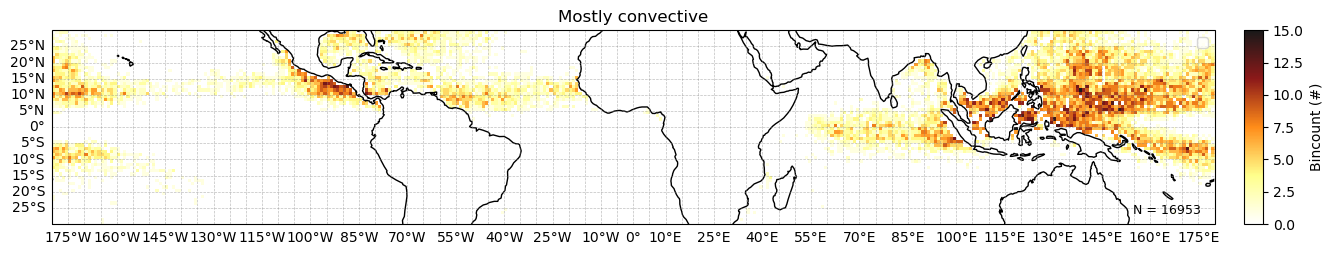

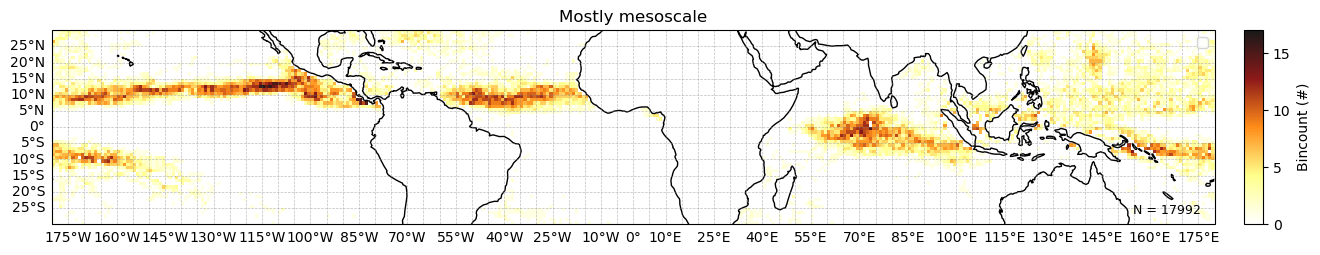

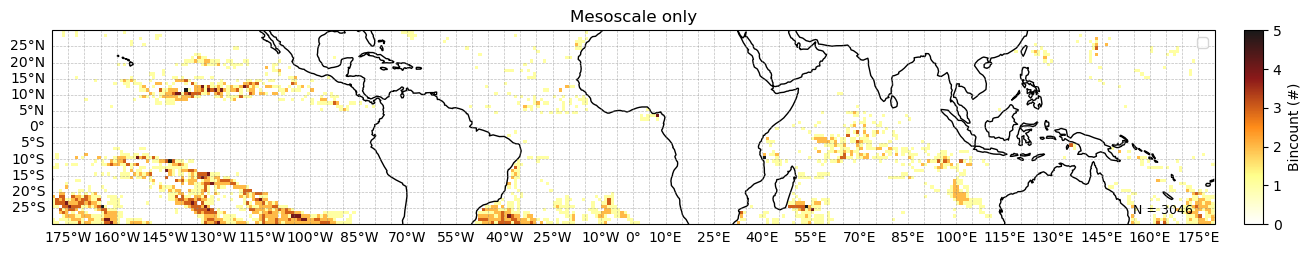

In [9]:
import cartopy.crs as ccrs
import os 
%matplotlib inline
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd =joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_99_Prec", nd=5, overwrite = True, dist_mask = False)

jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'
figdir = ''
for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    mask_yxt_ocean = np.logical_and(mask_yxt, ocean.values[:,:, np.newaxis])
    ax = jd.make_map(mask_yxt_ocean)

    # lon_min, lon_max = 215, 280 #gr.lon_slice.start , gr.lon_slice.stop
    # lat_min, lat_max = 5, 20#gr.lat_slice.start, gr.lat_slice.stop
    # ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
    #             [lat_min, lat_min, lat_max, lat_max, lat_min],
    #             color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Eastern Pacific ITCZ")
    # lon_min, lon_max = 130, 185 #gr.lon_slice.start , gr.lon_slice.stop
    # lat_min, lat_max = 0, 20#gr.lat_slice.start, gr.lat_slice.stop
    # ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
    #             [lat_min, lat_min, lat_max, lat_max, lat_min],
    #             color='blue', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Pacific Warmpool")
    
    ax.legend()
    
    ax.set_title(mask_name)

    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

## Last utime init of MCS within gz file

In [10]:
inits = [storm.Utime_Init for storm in jd.storms]
ends = [storm.Utime_End for storm in jd.storms]

AttributeError: 'JointDistribution' object has no attribute 'storms'

In [ ]:
max(inits)

17053.47

# Back to region tropics

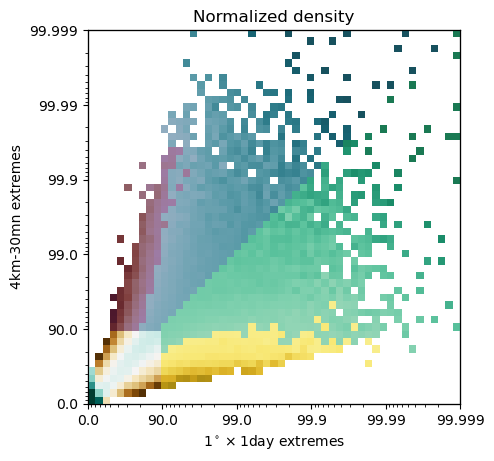

In [ ]:
%matplotlib inline
jd.plot(branch=False)

Convective only
figure size = 15 3.25
Mostly convective
figure size = 15 3.25
Mostly mesoscale
figure size = 15 3.25
Mesoscale only
figure size = 15 3.25


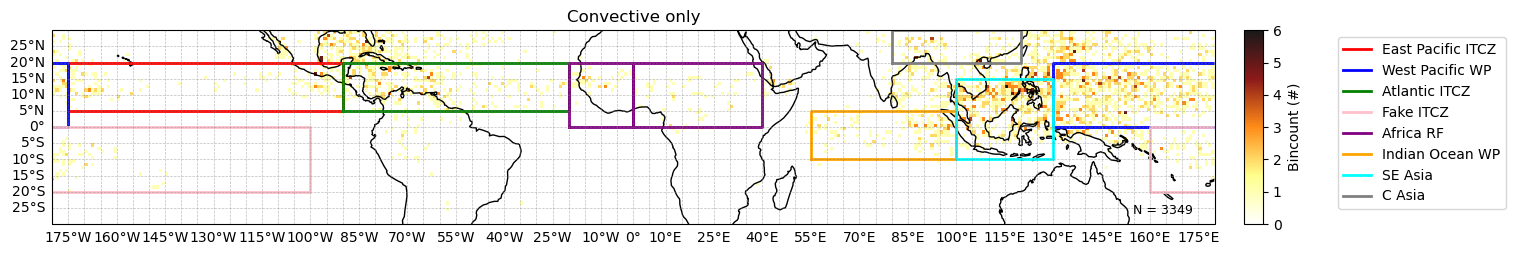

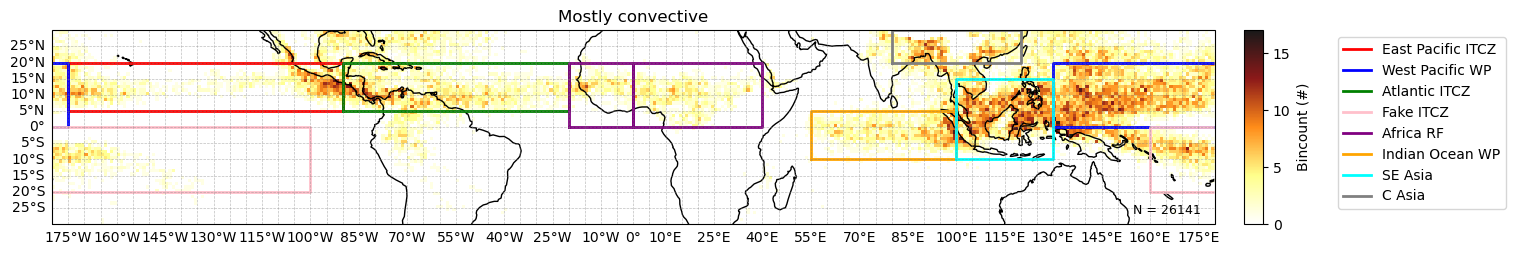

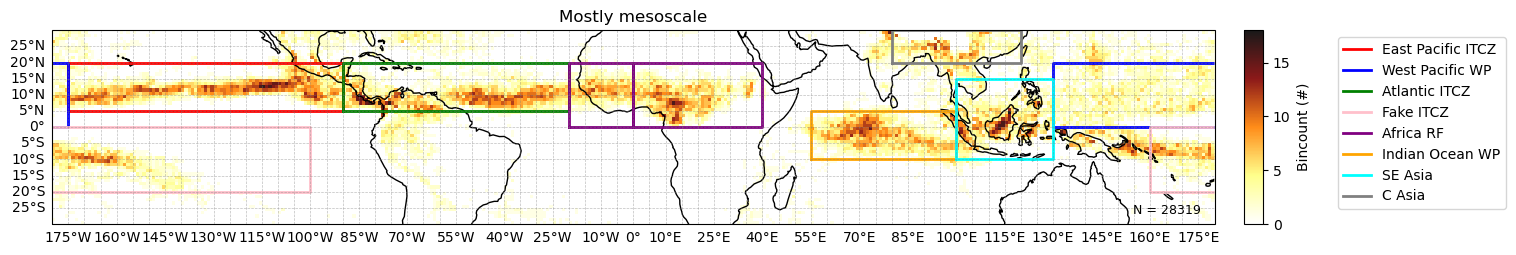

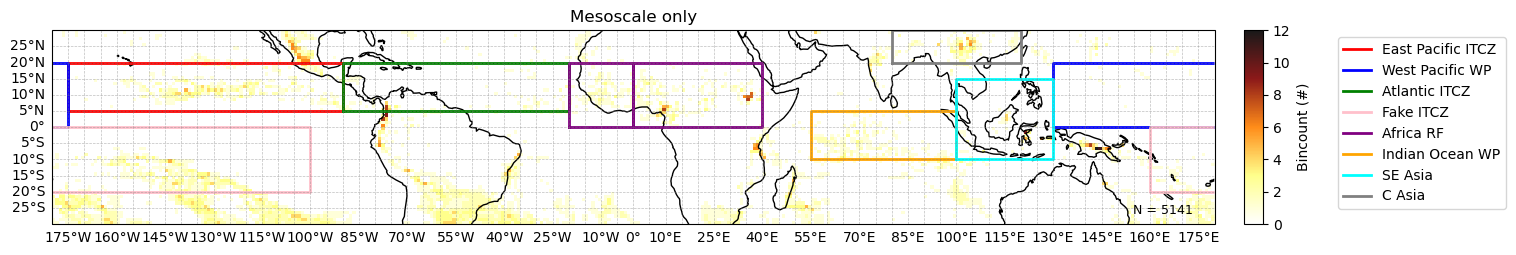

In [11]:
import cartopy.crs as ccrs
%matplotlib inline
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    
    #EP ITCZ
    lon_min, lon_max = 185, 270 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "East Pacific ITCZ")
    
    # WPWP
    lon_min, lon_max = 130, 185 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='blue', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "West Pacific WP")
    
    # Atlantic ITCZ
    lon_min, lon_max = 270, 340 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='green', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Atlantic ITCZ")
    
    # Fake ITCZ
    lon_min, lon_max = 160, 260 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = -20, 0 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='pink', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Fake ITCZ")
    
    # Africa Rain Forest
    lon_min, lon_max = 340, 360 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='purple', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Africa RF")
    
    # Twice is best Africa Rain Forest
    lon_min, lon_max = 0, 40 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='purple', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())
    
    # Indian Ocean Warmm Pool
    lon_min, lon_max = 55, 100 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = -10, 5 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='orange', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Indian Ocean WP")
    

    # South East Asia
    lon_min, lon_max = 100, 130 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = -10, 15 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='cyan', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "SE Asia")
    
    # Central Asial
    lon_min, lon_max = 80, 120 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 20, 30 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='gray', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "C Asia")
    
    ax.legend(bbox_to_anchor = (1.1, 1))
    
    ax.set_title(mask_name)

    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

# Pre computation
### mcs bin (TODO to be regionalized ?)

(<AxesSubplot:xlabel='mean_unweighted_Prec', ylabel='cond_alpha_99_Prec'>,
 <matplotlib.colorbar.Colorbar at 0x15053f7cd520>)

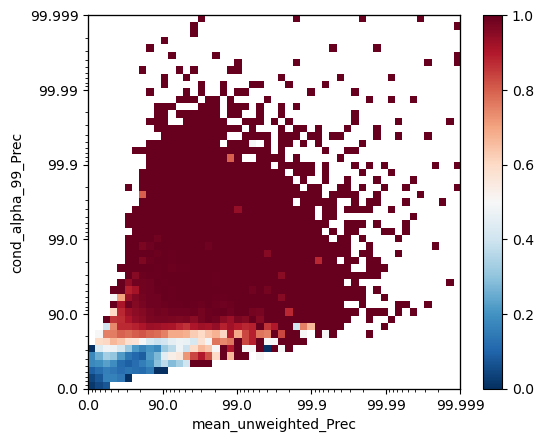

In [16]:
data, noise, count = jd.get_mcs_bin_fraction(0)
# noise= np.empty_like(noise)
jd.plot_data(data, noise, branch=False)

### Growth rate

In [ ]:
from tempest.storm_analysis import set_storm_growth_rate
compute = False
if compute:
    storms_growth_rates = []
    outputs = [] # r_squared, growth_r_squared, decay_r_squared, t_breaks, s_max
    for storm in jd.storms:
        output = set_storm_growth_rate(storm) # total, growth, decay
        storms_growth_rates.append(storm.growth_rate)
        outputs.append(output)
    ## save the babies pls
    storms_growth_rates = np.array(storms_growth_rates)
    file = os.path.join(jd.jd_path, 'storms_growth_rates.npy')
    np.save(file, storms_growth_rates)
    
    # outputs contains r_scores and all computation stuff 
    
    # outputs= np.array(outputs)
    # file = os.path.join(jd.jd_path, 'outputs_growth_rate.npy')

else : 
    file = os.path.join(jd.jd_path, 'storms_growth_rates.npy')
    storms_growth_rates = np.load(file)
    for storm, growth_rate in zip(jd.storms, storms_growth_rates):
        setattr(storm, 'growth_rate', growth_rate)
        
    # file = os.path.join(jd.jd_path, "outputs_growth_rate")
    # outputs = np.load(file)

In [ ]:
growth_rates = [jd.storm_attributes_on_jdist('growth_rate', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]

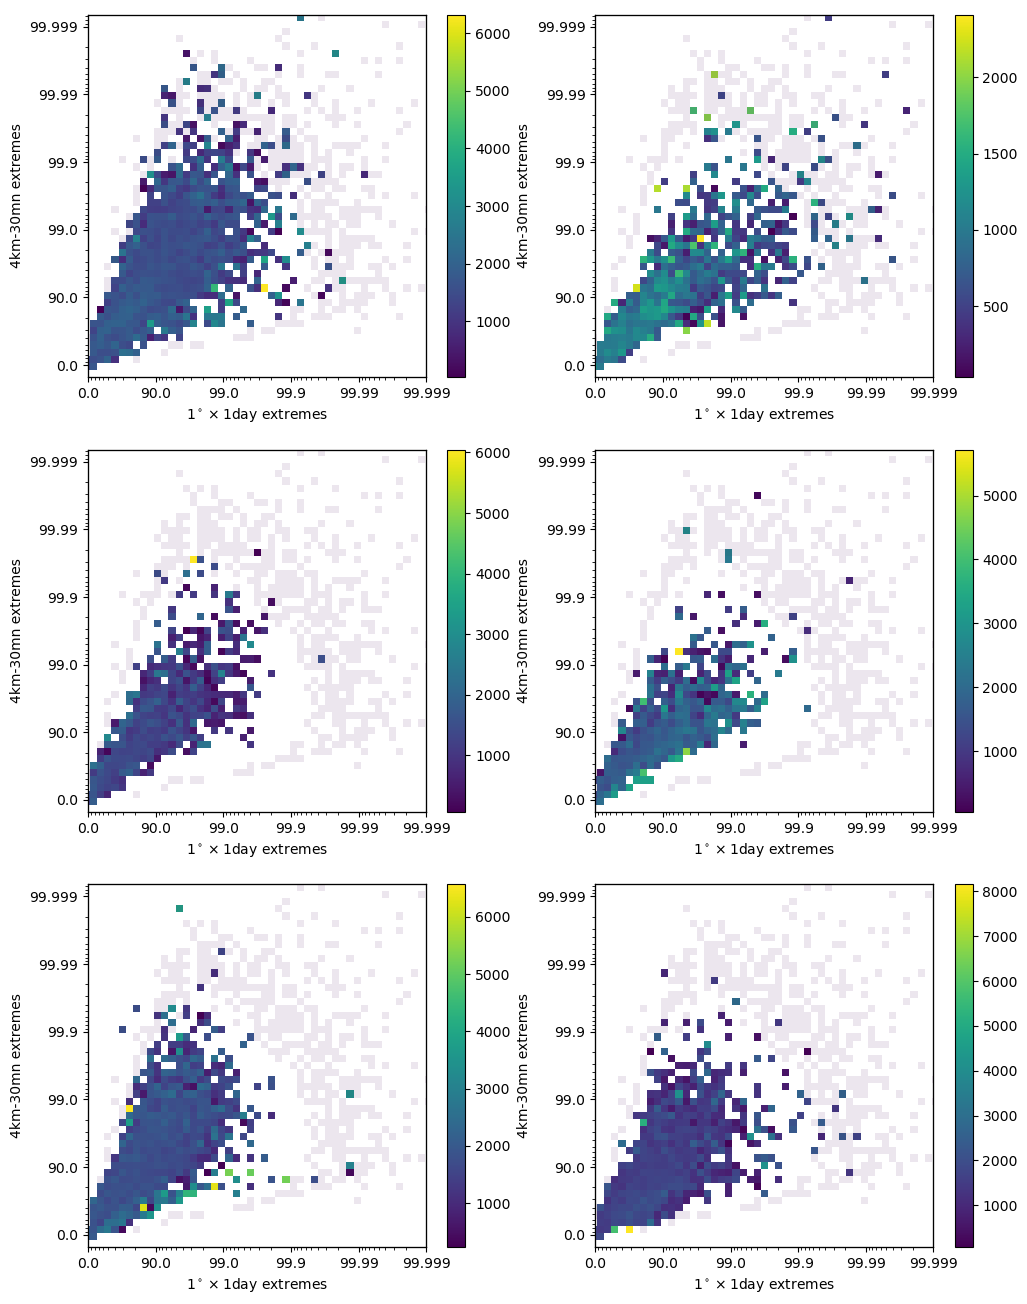

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (12, 16))

for growth_rate, ax in zip(growth_rates, axs.flatten()):
    jd.plot_data(growth_rate, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

## Surf max

In [ ]:
surfaces = [jd.storm_attributes_on_jdist('surfmaxkm2_172Wm2', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

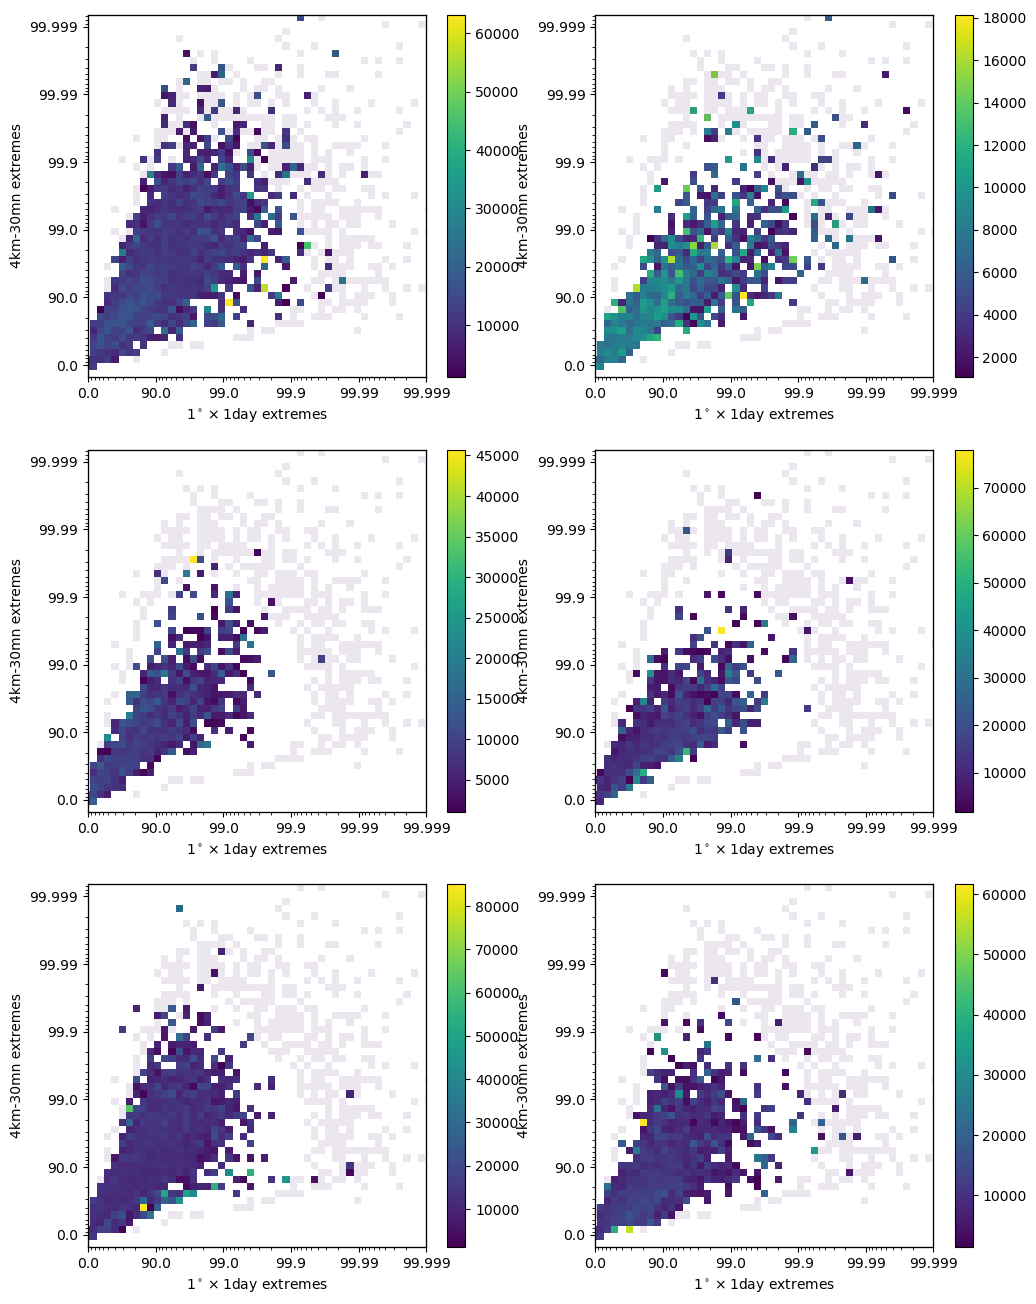

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 16))

for data, ax in zip(surfaces, axs.flatten()):
    jd.plot_data(data, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

In [ ]:
durations = [jd.storm_attributes_on_jdist('duration', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]


123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

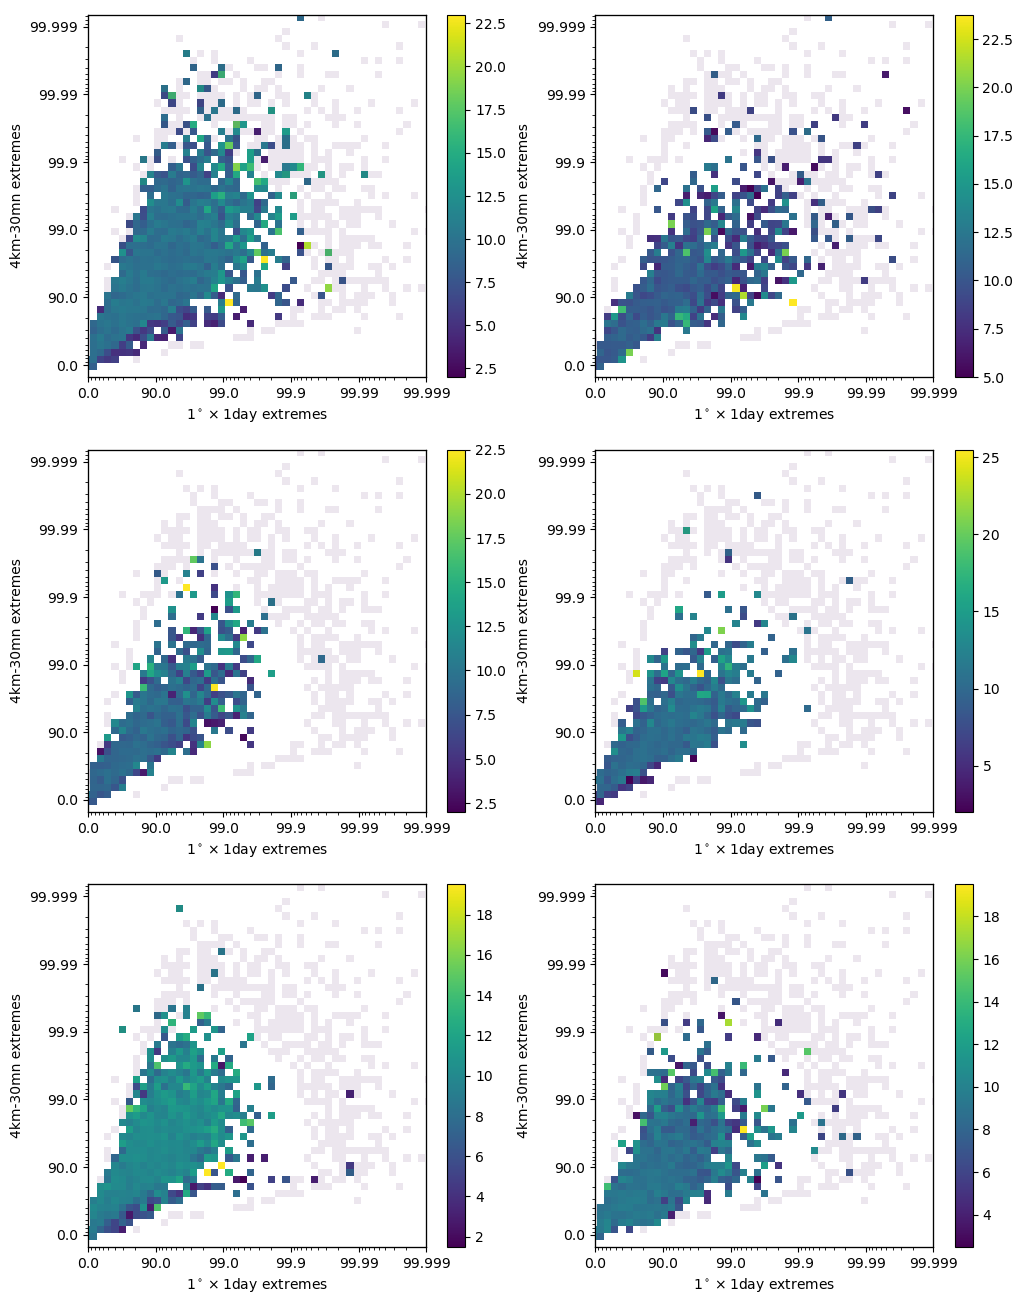

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 16))

for data, ax in zip(durations, axs.flatten()):
    jd.plot_data(data, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

In [ ]:
distances = [jd.storm_attributes_on_jdist('dist', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 16))

for data, ax in zip(distances, axs.flatten()):
    jd.plot_data(data, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

Text(0.5, 1.0, 'Mean growth rate')

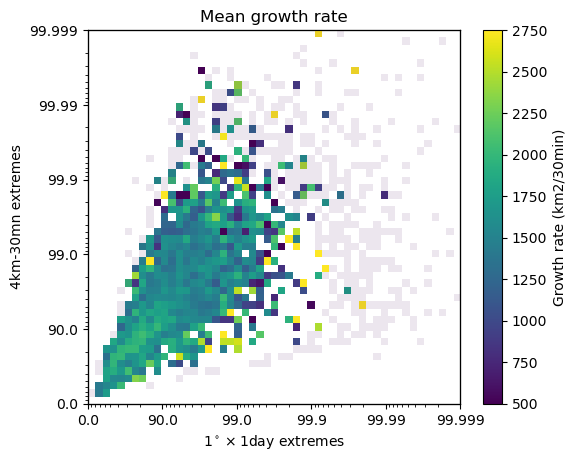

In [ ]:
mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'], region = "wpwp")[0][0,0,:,:]
jd.plot_data(mean_growth_rate, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/30min)', vbds = (500, 2750))
plt.title("Mean growth rate")

## East Pacific ITCZ

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

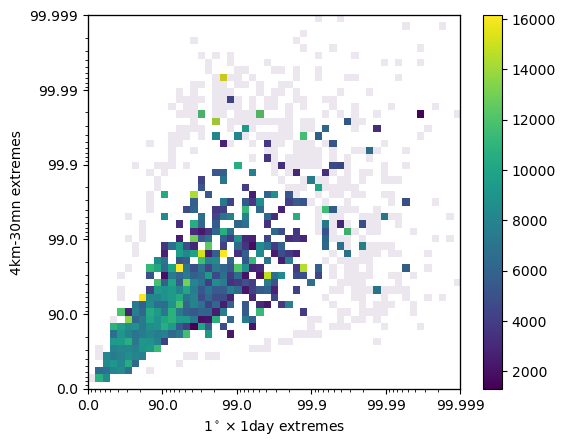

In [ ]:
A_mean = jd.storm_attributes_on_jdist(['surfmaxkm2_172Wm2'], ['mean'], region = "ep_itcz")
A_mean = A_mean[0][0,0]
jd.plot_data(A_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

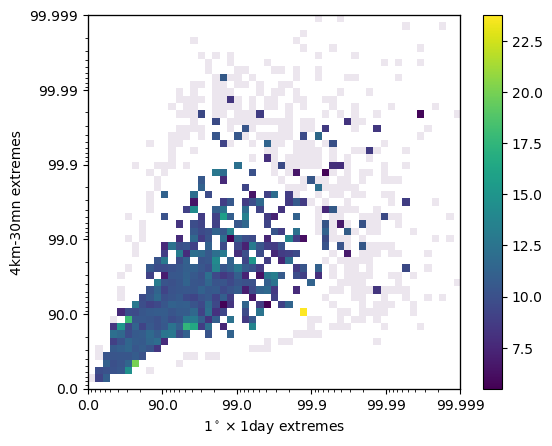

In [ ]:
duration_mean = jd.storm_attributes_on_jdist(['duration'], ['mean'], region = "ep_itcz")
duration_mean = duration_mean[0][0,0,:,:]
jd.plot_data(duration_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

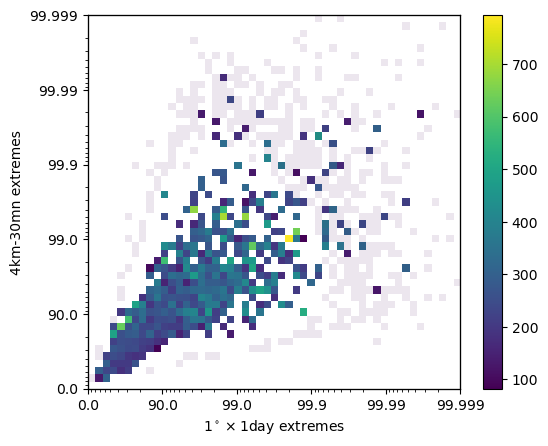

In [ ]:
dist_mean = jd.storm_attributes_on_jdist(['dist'], ['mean'], region = "ep_itcz")
dist_mean = dist_mean[0][0,0]
jd.plot_data(dist_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

Text(0.5, 1.0, 'Mean growth rate')

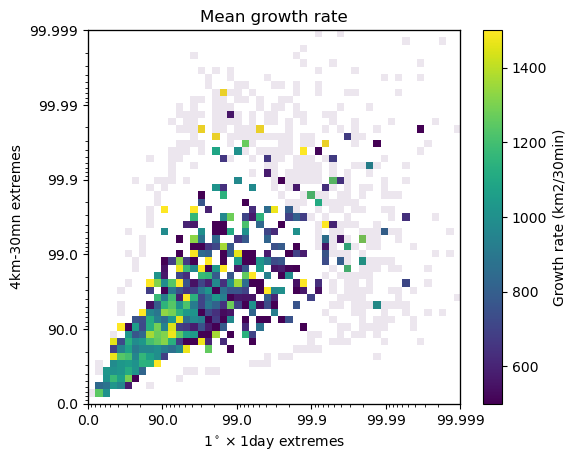

In [ ]:
mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'], region = "ep_itcz")[0][0,0,:,:]
jd.plot_data(mean_growth_rate, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/30min)', vbds = (500, 1500))
plt.title("Mean growth rate")

## ATlantic ITCZ

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

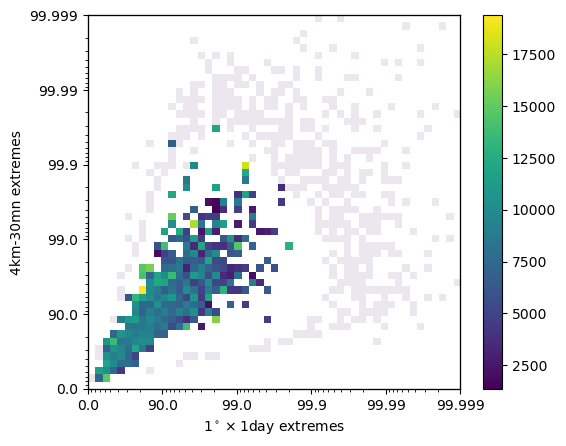

In [ ]:
A_mean = jd.storm_attributes_on_jdist(['surfmaxkm2_172Wm2'], ['mean'], region = "atl_itcz")
A_mean = A_mean[0][0,0]
jd.plot_data(A_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

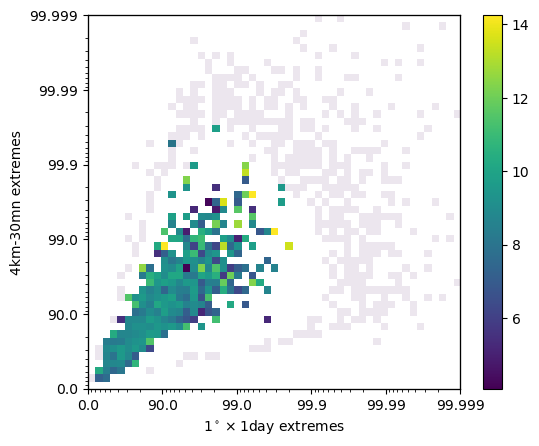

In [ ]:
duration_mean = jd.storm_attributes_on_jdist(['duration'], ['mean'], region = "atl_itcz")
duration_mean = duration_mean[0][0,0,:,:]
jd.plot_data(duration_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

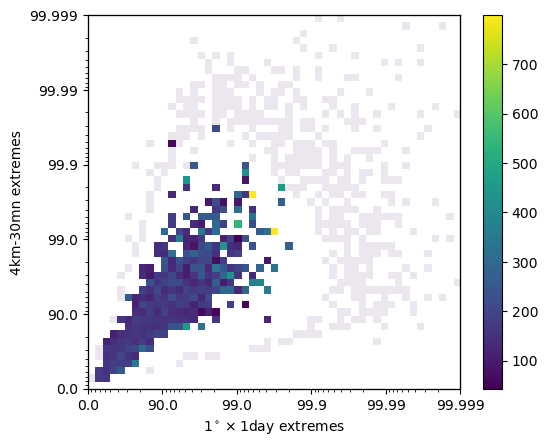

In [ ]:
dist_mean = jd.storm_attributes_on_jdist(['dist'], ['mean'], region = "atl_itcz")
dist_mean = dist_mean[0][0,0]
jd.plot_data(dist_mean, noise, cmap = plt.cm.viridis, branch=False)

Text(0.5, 1.0, 'Mean growth rate')

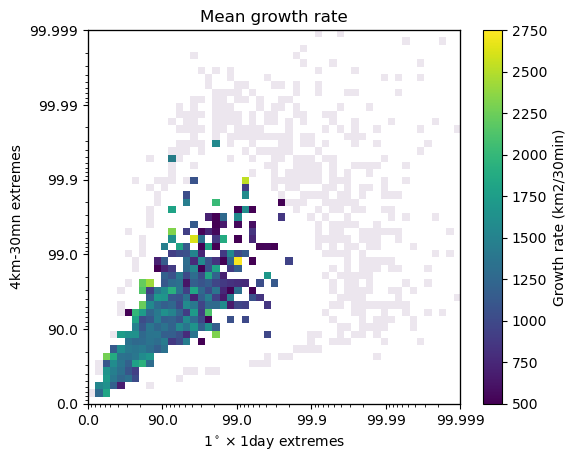

In [24]:
# mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'], region = "atl_itcz")[0][0,0,:,:]
jd.plot_data(mean_growth_rate, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/30min)', vbds = (500, 2750))
plt.title("Mean growth rate")

# Dev

In [88]:
#add 180 to longitudes because mask index goes from 0 to 360, not -180 to 180 !!!
lon_min, lon_max = 210, 365 #gr.lon_slice.start , gr.lon_slice.stop
lon_slice = slice(lon_min, lon_max)
#add 30 to latitudes because mask index goes from 0 to 60, not -30 to 30 !!!
lat_min, lat_max = 30, 50 #gr.lat_slice.start + 30 !!, gr.lat_slice.stop
lat_slice = slice(lat_min, lat_max)

In [89]:
def get_mask_yxt(self, d1, d2, regional = False, lat_slice = None, lon_slice = None):
    dj = self.joint_digit(d1, d2)
    dj_3d = self.joint_digit(self.digit_3d_1, self.digit_3d_2)
    mask = dj_3d == dj
    if regional : 
        region_mask = np.zeros_like(mask, dtype = bool)
        if lat_slice is not None and lon_slice is not None:
            region_mask[lat_slice, lon_slice] = mask[lat_slice, lon_slice] 
        mask = region_mask
    return mask

In [90]:
wpwp_ij_mask = get_mask_yxt(jd, 1, 1, True, lat_slice, lon_slice)
# wpwp_ij_mask = get_mask_yxt(jd, 1, 1)
np.all(wpwp_ij_mask[:,:,:]==False)

False